In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.

import os


# Any results you write to the current directory are saved as output.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

******** Importing Files

In [3]:
os.chdir(r'C:\Users\fizzza\Desktop\data mining')
dept = pd.read_csv(r'departments.csv')
aisle = pd.read_csv(r'aisles.csv')
prior = pd.read_csv(r'order_products__prior.csv')
train = pd.read_csv(r'order_products__train.csv')
order = pd.read_csv(r'orders.csv')
product = pd.read_csv(r'products.csv')

No missing values  in prior data set

In [5]:
dept.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [6]:
aisle.head()


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [4]:
prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [7]:
order.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [8]:
product.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [9]:
prior = prior[:300000]

In [10]:
#checking null values in prior data_set
cols = list(prior.columns)
print(cols)
for col in cols:
    nan_cnt =  prior[prior[col].isnull()].index.values
    print(len(nan_cnt))

['order_id', 'product_id', 'add_to_cart_order', 'reordered']
0
0
0
0


No missing values found

In [11]:
train.describe(include ='all')

,order_id,product_id,add_to_cart_order,reordered
count,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06
mean,1.706298e+06,2.555624e+04,8.758044e+00,5.985944e-01
std,9.897326e+05,1.412127e+04,7.423936e+00,4.901829e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,8.433700e+05,1.338000e+04,3.000000e+00,0.000000e+00
50%,1.701880e+06,2.529800e+04,7.000000e+00,1.000000e+00
75%,2.568023e+06,3.794000e+04,1.200000e+01,1.000000e+00
max,3.421070e+06,4.968800e+04,8.000000e+01,1.000000e+00


In [12]:
cols = list(train.columns)
print(cols)
for col in cols:
    nan_cnt =  train[train[col].isnull()].index.values
    print(len(nan_cnt))

['order_id', 'product_id', 'add_to_cart_order', 'reordered']
0
0
0
0


In [13]:
prior.corr()

,order_id,product_id,add_to_cart_order,reordered
order_id,1.000000,-0.000446,0.011348,-0.008256
product_id,-0.000446,1.000000,0.004958,0.002487
add_to_cart_order,0.011348,0.004958,1.000000,-0.135540
reordered,-0.008256,0.002487,-0.135540,1.000000


In [14]:
product.describe(include = 'all')

,product_id,product_name,aisle_id,department_id
count,49688.000000,49688,49688.000000,49688.000000
unique,NaN,49688,NaN,NaN
top,NaN,Hair Shampoo,NaN,NaN
freq,NaN,1,NaN,NaN
mean,24844.500000,NaN,67.769582,11.728687
std,14343.834425,NaN,38.316162,5.850410
min,1.000000,NaN,1.000000,1.000000
25%,12422.750000,NaN,35.000000,7.000000
50%,24844.500000,NaN,69.000000,13.000000
75%,37266.250000,NaN,100.000000,17.000000


In [15]:
cols = list(product.columns)
print(cols)
for col in cols:
    nan_cnt =  product[product[col].isnull()].index.values
    print(len(nan_cnt))

['product_id', 'product_name', 'aisle_id', 'department_id']
0
0
0
0


Thus, Only orders data set contain null values in the column days since prior order

****Analysing orders dataframe******

In [16]:
order.describe(include= 'all')

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,3.421083e+06,3.421083e+06,3421083,3.421083e+06,3.421083e+06,3.421083e+06,3.214874e+06
unique,NaN,NaN,3,NaN,NaN,NaN,NaN
top,NaN,NaN,prior,NaN,NaN,NaN,NaN
freq,NaN,NaN,3214874,NaN,NaN,NaN,NaN
mean,1.710542e+06,1.029782e+05,NaN,1.715486e+01,2.776219e+00,1.345202e+01,1.111484e+01
std,9.875817e+05,5.953372e+04,NaN,1.773316e+01,2.046829e+00,4.226088e+00,9.206737e+00
min,1.000000e+00,1.000000e+00,NaN,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.552715e+05,5.139400e+04,NaN,5.000000e+00,1.000000e+00,1.000000e+01,4.000000e+00
50%,1.710542e+06,1.026890e+05,NaN,1.100000e+01,3.000000e+00,1.300000e+01,7.000000e+00
75%,2.565812e+06,1.543850e+05,NaN,2.300000e+01,5.000000e+00,1.600000e+01,1.500000e+01


In [17]:
cols = list(order.columns)
print(cols)
for col in cols:
    nan_cnt =  order[order[col].isnull()].index.values
    print(len(nan_cnt))

['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order']
0
0
0
0
0
0
206209


In [26]:
print(order['user_id'].nunique())

206209


Analysed that count of null values in days since prior order equals the numberof users. Thus replacing the value by 0.

In [27]:
order.head(20)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [28]:
order.dtypes


order_id                    int64
user_id                     int64
eval_set                   object
order_number                int64
order_dow                   int64
order_hour_of_day           int64
days_since_prior_order    float64
dtype: object

In [29]:
order.shape

(3421083, 7)

In [30]:
prior.shape

(300000, 4)

Evaluting the distribution

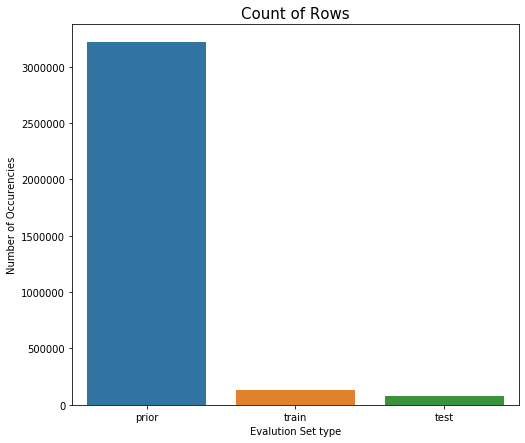

In [31]:
#cnt_set_dist = order.eval_set.value_counts()
plt.figure(figsize=(8,7))
#sns.barplot(cnt_set_dist.index,cnt_set_dist.values)
sns.countplot(x='eval_set',data=order)
plt.xlabel('Evalution Set type')
plt.ylabel('Number of Occurencies')
plt.title('Count of Rows',fontsize = 15)
plt.show()

In [32]:
df = order.eval_set.value_counts()
df

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64

Number of orders per user_id and occurenciees of maximum order

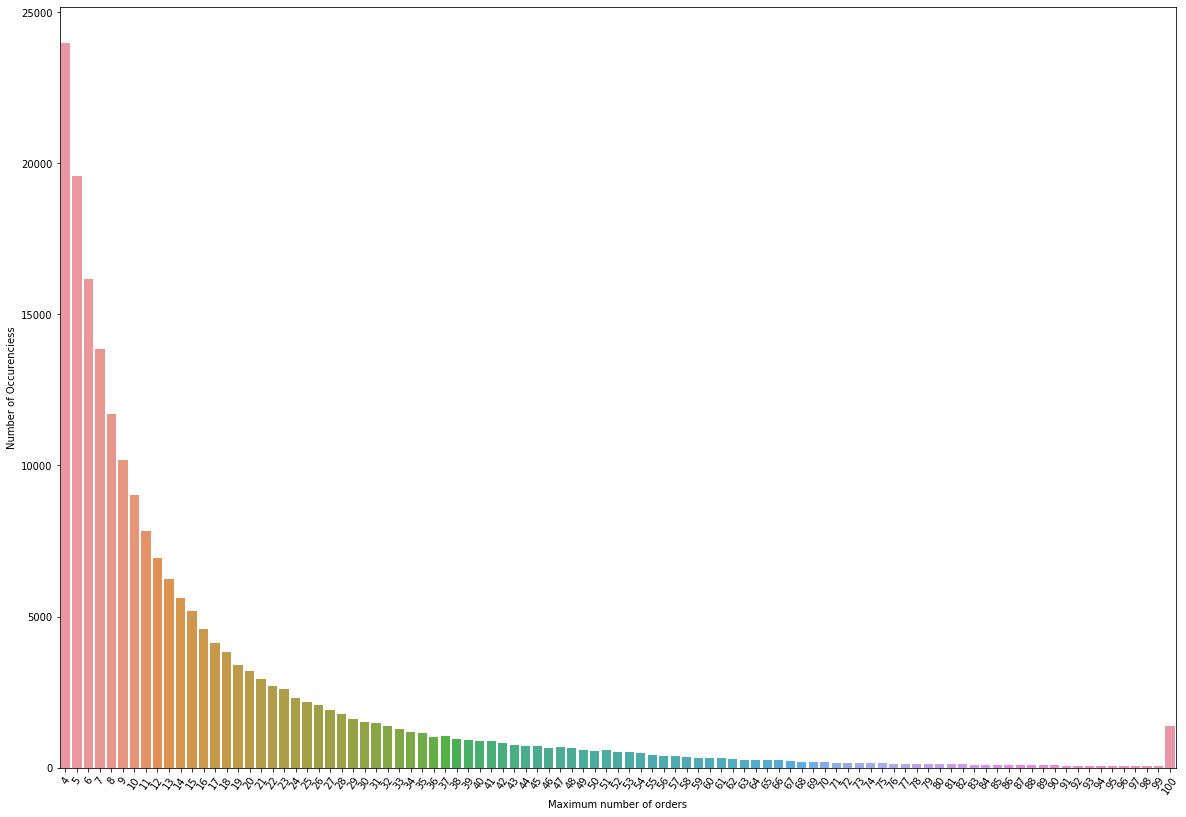

In [25]:
cnt_orders = order.groupby('user_id')['order_number'].aggregate(np.max).reset_index()
#cnt_orders
cnt_max =  cnt_orders.order_number.value_counts()
plt.figure(figsize = (20,14))
sns.barplot(cnt_max.index,cnt_max.values)
plt.xticks(rotation = 55)
plt.xlabel('Maximum number of orders')
plt.ylabel('Number of Occurenciess')
plt.show()

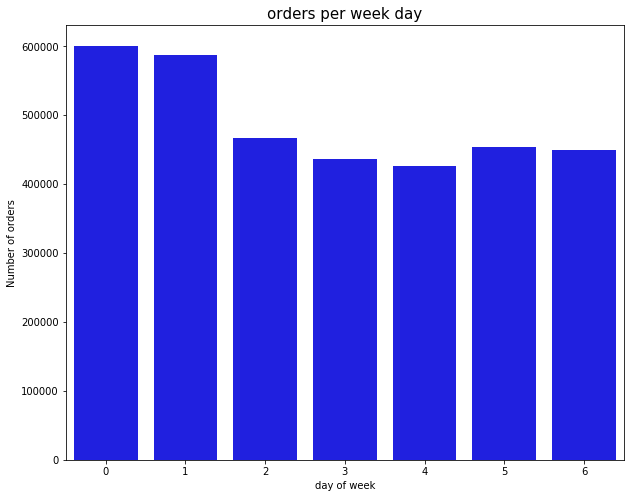

In [33]:
plt.figure(figsize = (10,8))
sns.countplot(x='order_dow',data = order,color = 'blue')
plt.xlabel('day of week')
plt.ylabel('Number of orders')
plt.title('orders per week day',fontsize = 15)
plt.show()

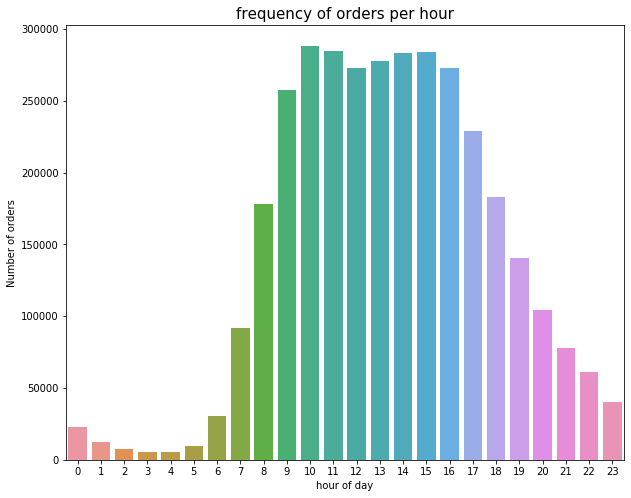

In [34]:
plt.figure(figsize = (10,8))
sns.countplot(x='order_hour_of_day',data = order)
plt.xlabel('hour of day')
plt.ylabel('Number of orders')
plt.title('frequency of orders per hour',fontsize = 15)
plt.show()

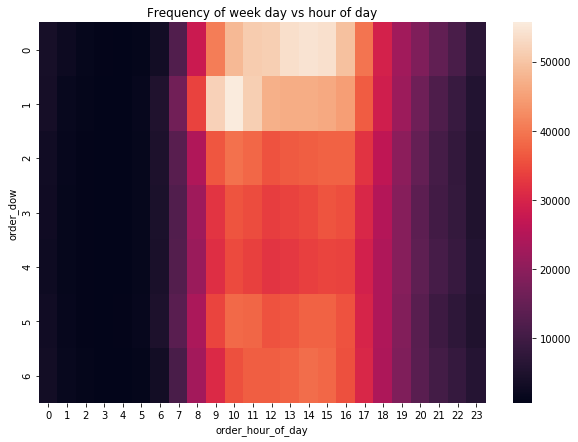

In [35]:
grouped_df = order.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'order_number')
#return the reordered dataframe with index order_dow, column oder_hour_of_day, and values = order_number 
plt.figure(figsize = (10,7))
sns.heatmap(grouped_df)
plt.title('Frequency of week day vs hour of day')
plt.show()


In [36]:
order['days_since_prior_order'] = order['days_since_prior_order'].replace(to_replace=np.nan,value=0)
order.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,0.0
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


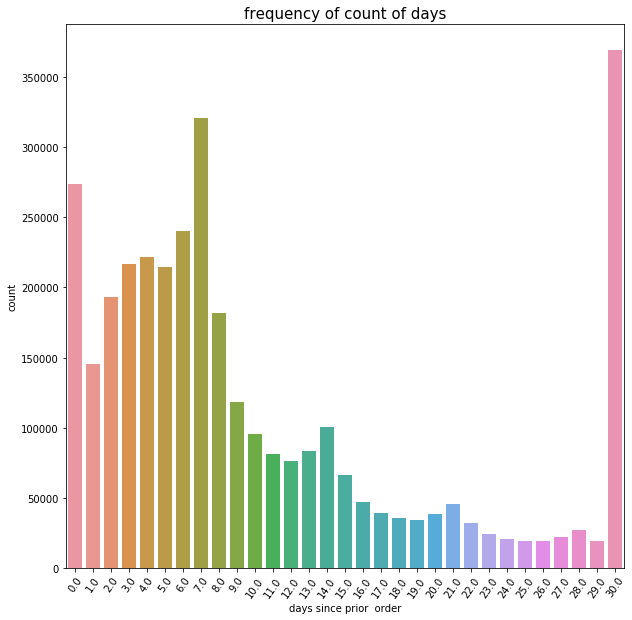

In [37]:
plt.figure(figsize = (10,10))
sns.countplot(x='days_since_prior_order',data = order)
plt.xlabel('days since prior  order')
plt.ylabel('count')
plt.title('frequency of count of days',fontsize = 15)
plt.xticks(rotation = 55)
plt.show()

In [38]:
print(order[order['days_since_prior_order']==0].nunique())

order_id                  273964
user_id                   206209
eval_set                       3
order_number                 100
order_dow                      7
order_hour_of_day             24
days_since_prior_order         1
dtype: int64


In [39]:
order_product_prior = pd.merge(prior,product,on='product_id',how = 'left')
order_product_prior = pd.merge(order_product_prior,aisle,on='aisle_id',how = 'left')
order_product_prior = pd.merge(order_product_prior,dept,on='department_id',how = 'left')
order_product_prior.head(10)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry
5,2,17794,6,1,Carrots,83,4,fresh vegetables,produce
6,2,40141,7,1,Original Unflavored Gelatine Mix,105,13,doughs gelatins bake mixes,pantry
7,2,1819,8,1,All Natural No Stir Creamy Almond Butter,88,13,spreads,pantry
8,2,43668,9,0,Classic Blend Cole Slaw,123,4,packaged vegetables fruits,produce
9,3,33754,1,1,Total 2% with Strawberry Lowfat Greek Strained...,120,16,yogurt,dairy eggs


In [40]:
order_product_prior.describe(include='all')

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
count,300000.000000,300000.000000,300000.000000,300000.000000,300000,300000.000000,300000.000000,300000,300000
unique,NaN,NaN,NaN,NaN,24836,NaN,NaN,134,21
top,NaN,NaN,NaN,NaN,Banana,NaN,NaN,fresh fruits,produce
freq,NaN,NaN,NaN,NaN,4432,NaN,NaN,33755,86941
mean,15817.685977,25551.027277,8.368427,0.589017,NaN,71.140950,9.949067,NaN,NaN
std,9115.985026,14105.690135,7.137631,0.492013,NaN,38.219456,6.286217,NaN,NaN
min,2.000000,1.000000,1.000000,0.000000,NaN,1.000000,1.000000,NaN,NaN
25%,7973.000000,13517.000000,3.000000,0.000000,NaN,31.000000,4.000000,NaN,NaN
50%,15807.000000,25162.000000,6.000000,1.000000,NaN,83.000000,9.000000,NaN,NaN
75%,23713.000000,37836.000000,11.000000,1.000000,NaN,107.000000,16.000000,NaN,NaN


In [41]:
order_product_train = pd.merge(train,product,on='product_id',how = 'left')
order_product_train = pd.merge(order_product_train,aisle,on='aisle_id',how = 'left')
order_product_train = pd.merge(order_product_train,dept,on='department_id',how = 'left')
order_product_train.head(10)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,1,49302,1,1,Bulgarian Yogurt,120,16,yogurt,dairy eggs
1,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,other creams cheeses,dairy eggs
2,1,10246,3,0,Organic Celery Hearts,83,4,fresh vegetables,produce
3,1,49683,4,0,Cucumber Kirby,83,4,fresh vegetables,produce
4,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15,canned meat seafood,canned goods
5,1,13176,6,0,Bag of Organic Bananas,24,4,fresh fruits,produce
6,1,47209,7,0,Organic Hass Avocado,24,4,fresh fruits,produce
7,1,22035,8,1,Organic Whole String Cheese,21,16,packaged cheese,dairy eggs
8,36,39612,1,0,Grated Pecorino Romano Cheese,2,16,specialty cheeses,dairy eggs
9,36,19660,2,1,Spring Water,115,7,water seltzer sparkling water,beverages


In [42]:
order_product_train.describe(include='all')

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
count,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1384617,1.384617e+06,1.384617e+06,1384617,1384617
unique,NaN,NaN,NaN,NaN,39123,NaN,NaN,134,21
top,NaN,NaN,NaN,NaN,Banana,NaN,NaN,fresh vegetables,produce
freq,NaN,NaN,NaN,NaN,18726,NaN,NaN,150609,409087
mean,1.706298e+06,2.555624e+04,8.758044e+00,5.985944e-01,NaN,7.130423e+01,9.839777e+00,NaN,NaN
std,9.897326e+05,1.412127e+04,7.423936e+00,4.901829e-01,NaN,3.810409e+01,6.292830e+00,NaN,NaN
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,NaN,1.000000e+00,1.000000e+00,NaN,NaN
25%,8.433700e+05,1.338000e+04,3.000000e+00,0.000000e+00,NaN,3.100000e+01,4.000000e+00,NaN,NaN
50%,1.701880e+06,2.529800e+04,7.000000e+00,1.000000e+00,NaN,8.300000e+01,8.000000e+00,NaN,NaN
75%,2.568023e+06,3.794000e+04,1.200000e+01,1.000000e+00,NaN,1.070000e+02,1.600000e+01,NaN,NaN


In [43]:
order_product_prior.dtypes
order_product_prior.shape

(300000, 9)

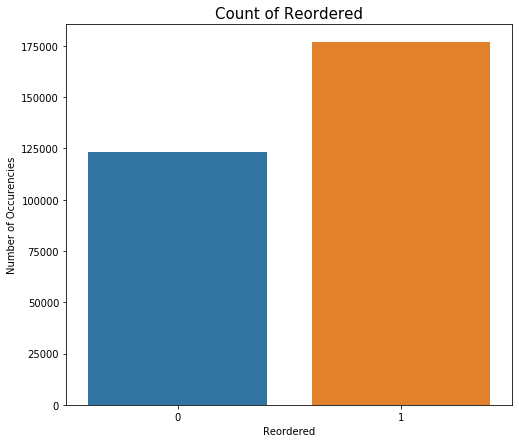

In [44]:
plt.figure(figsize=(8,7))
sns.countplot(x='reordered',data=order_product_prior)
plt.xlabel('Reordered')
plt.ylabel('Number of Occurencies')
plt.title('Count of Reordered',fontsize = 15)
plt.show()

In [45]:
df = order_product_prior.reordered.value_counts()
df

1    176705
0    123295
Name: reordered, dtype: int64

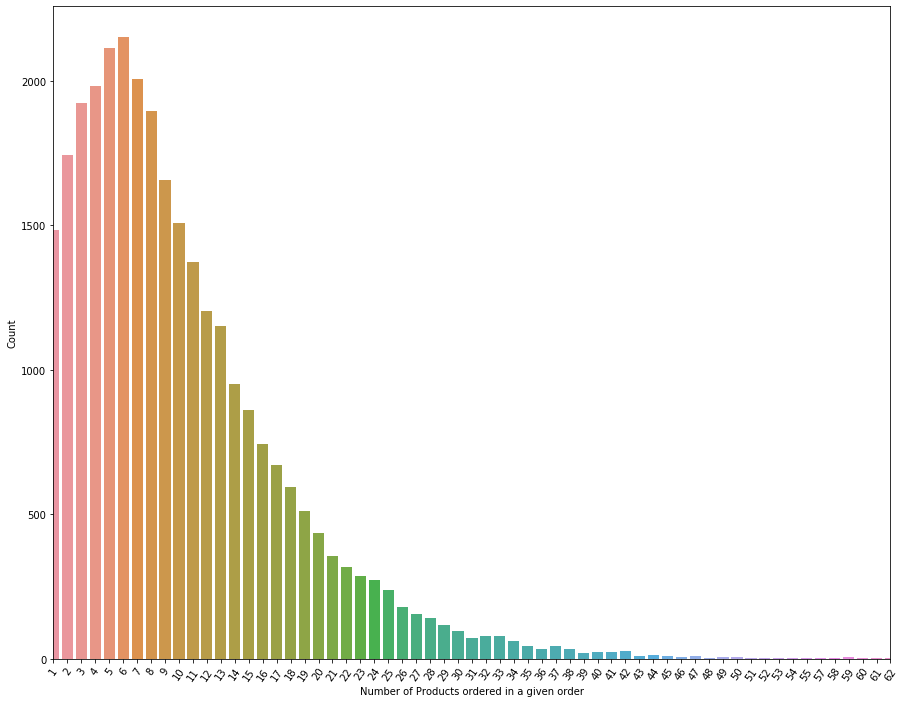

In [46]:
cart = order_product_prior.groupby('order_id')['add_to_cart_order'].aggregate('max').reset_index()
cart = cart.add_to_cart_order.value_counts()

plt.figure(figsize=(15,12))
sns.barplot(cart.index,cart.values)

plt.xlim(0,60)
plt.xticks(rotation = 55)
plt.xlabel('Number of Products ordered in a given order')
plt.ylabel('Count')
plt.show()


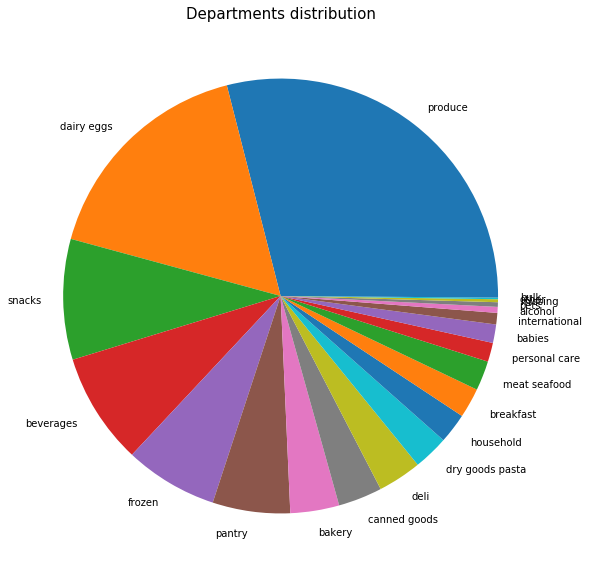

In [47]:
plt.figure(figsize=(10,10))
temp_series = order_product_prior['department'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
plt.pie(sizes, labels=labels) #autopct='%1.1f%%', startangle=200)
plt.title("Departments distribution", fontsize=15)
plt.show()


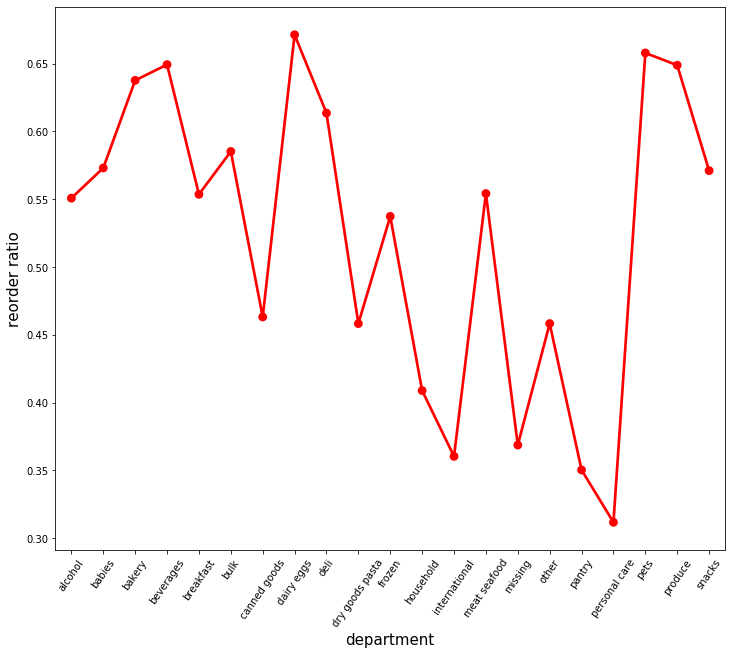

In [48]:
dept_df = order_product_prior.groupby('department')['reordered'].aggregate('mean').reset_index()
plt.figure(figsize=(12,10))
sns.pointplot(dept_df['department'].values,dept_df['reordered'],color = 'red')
plt.xlabel('department',fontsize = 15)
plt.ylabel('reorder ratio',fontsize = 15)
plt.xticks(rotation = 55)
plt.show()


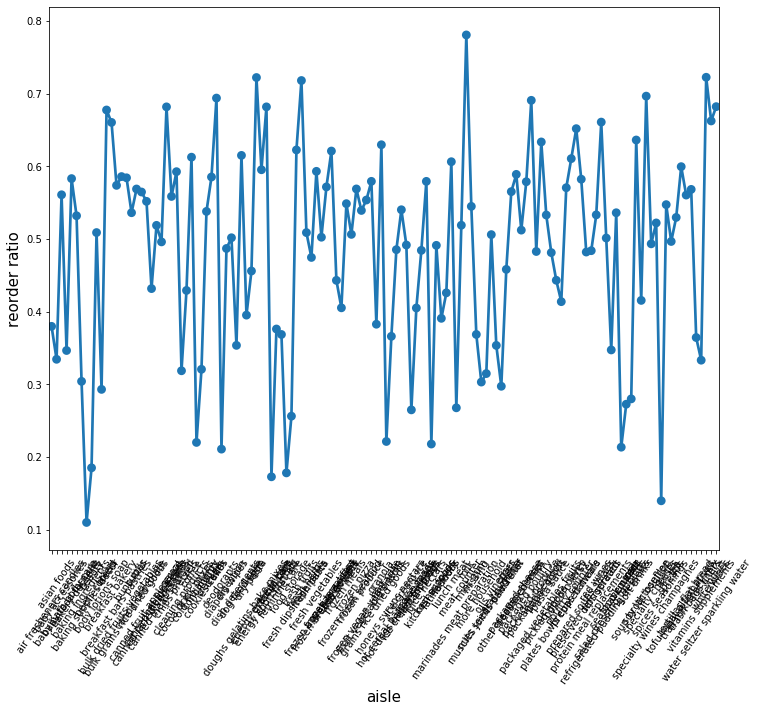

In [49]:
aisle_df = order_product_prior.groupby('aisle')['reordered'].aggregate('mean').reset_index()
plt.figure(figsize=(12,10))
sns.pointplot(aisle_df['aisle'].values,aisle_df['reordered'])
plt.xlabel('aisle',fontsize = 15)
plt.ylabel('reorder ratio',fontsize = 15)
plt.xticks(rotation = 55)
plt.show()


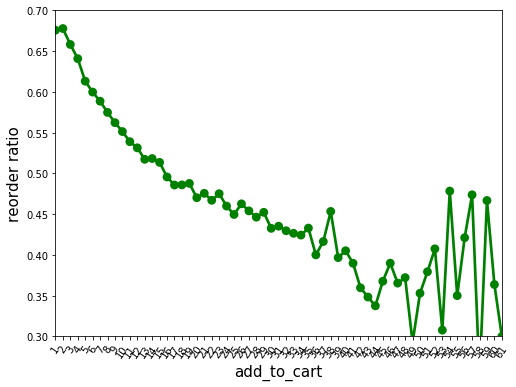

In [50]:
add_to_cart_df = order_product_prior.groupby('add_to_cart_order')['reordered'].aggregate('mean').reset_index()
plt.figure(figsize=(8,6))
sns.pointplot(add_to_cart_df['add_to_cart_order'].values,add_to_cart_df['reordered'],color = 'green')
plt.xlabel('add_to_cart',fontsize = 15)
plt.xlim(0,60)
plt.ylim(0.3,0.7)
plt.ylabel('reorder ratio',fontsize = 15)
plt.xticks(rotation = 55)
plt.show()

In [53]:
order.loc[order['eval_set'] == 'prior']

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,0.0
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [54]:
prior_set_combine = pd.merge(order_product_prior,order,on = 'order_id',how = 'left')
prior_set_combine.describe(include='all')

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,300000.000000,300000.000000,300000.000000,300000.000000,300000,300000.000000,300000.000000,300000,300000,300000.000000,300000,300000.000000,300000.000000,300000.000000,300000.000000
unique,NaN,NaN,NaN,NaN,24836,NaN,NaN,134,21,NaN,1,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,Banana,NaN,NaN,fresh fruits,produce,NaN,prior,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,4432,NaN,NaN,33755,86941,NaN,300000,NaN,NaN,NaN,NaN
mean,15817.685977,25551.027277,8.368427,0.589017,NaN,71.140950,9.949067,NaN,NaN,103361.552773,NaN,17.251443,2.727283,13.423577,10.249770
std,9115.985026,14105.690135,7.137631,0.492013,NaN,38.219456,6.286217,NaN,NaN,59446.623995,NaN,17.715858,2.078022,4.266508,8.780147
min,2.000000,1.000000,1.000000,0.000000,NaN,1.000000,1.000000,NaN,NaN,7.000000,NaN,1.000000,0.000000,0.000000,0.000000
25%,7973.000000,13517.000000,3.000000,0.000000,NaN,31.000000,4.000000,NaN,NaN,51609.000000,NaN,5.000000,1.000000,10.000000,4.000000
50%,15807.000000,25162.000000,6.000000,1.000000,NaN,83.000000,9.000000,NaN,NaN,103114.500000,NaN,11.000000,3.000000,13.000000,7.000000
75%,23713.000000,37836.000000,11.000000,1.000000,NaN,107.000000,16.000000,NaN,NaN,155396.000000,NaN,24.000000,5.000000,16.000000,14.000000


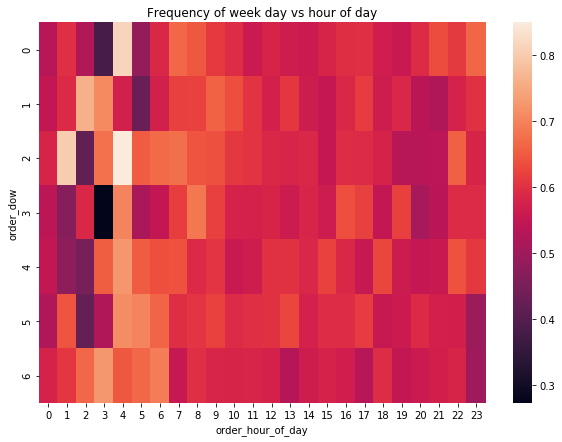

In [55]:
grouped_df = prior_set_combine.groupby(["order_dow", "order_hour_of_day"])["reordered"].aggregate("mean").reset_index()
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'reordered')
#return the reordered dataframe with index order_dow, column oder_hour_of_day, and values = order_number 
plt.figure(figsize = (10,7))
sns.heatmap(grouped_df)
plt.title('Frequency of week day vs hour of day')
plt.show()

In [56]:
group_df = order_product_prior.groupby(["product_name"])["reordered"].aggregate({'reorder_mean_product':"mean"}).reset_index()
#group_df 

Count of unique products = 49677

In [57]:
group_df1 = order_product_prior.groupby(["order_id"])["reordered"].aggregate({'reorder_mean_user': 'mean'}).reset_index()
#group_df1 

In [71]:
group_df2 = order_product_prior.groupby('order_id')['add_to_cart_order'].aggregate({'number of orders':'max'}).reset_index()
group = order_product_prior.groupby('order_id')['reordered'].aggregate({'reordered_cnt_per_id':'sum'}).reset_index()
group = pd.merge(group_df2,group,on = 'order_id')
group['reordered_frquency_per_id'] = group['reordered_cnt_per_id']/group['number of orders']
group

,order_id,number of orders,reordered_cnt_per_id,reordered_frquency_per_id
0,2,9,6,0.666667
1,3,8,8,1.000000
2,4,13,12,0.923077
3,5,26,21,0.807692
4,6,3,0,0.000000
5,7,2,0,0.000000
6,8,1,1,1.000000
7,9,15,10,0.666667
8,10,15,8,0.533333
9,11,5,5,1.000000


In [72]:
prior_df1 = pd.merge(prior_set_combine,group_df,on = 'product_name',how = 'right')
prior_df2 = pd.merge(prior_df1,group_df1,on = 'order_id',how = 'right')
prior_df = pd.merge(prior_df2,group,on = 'order_id',how = 'right')

In [73]:
prior_df

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,reorder_mean_product,reorder_mean_user,number of orders,reordered_cnt_per_id,reordered_frquency_per_id
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,202279,prior,3,5,9,8.0,0.741117,0.666667,9,6,0.666667
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.0,0.688312,0.666667,9,6,0.666667
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,202279,prior,3,5,9,8.0,0.244444,0.666667,9,6,0.666667
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry,202279,prior,3,5,9,8.0,0.500000,0.666667,9,6,0.666667
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry,202279,prior,3,5,9,8.0,0.375000,0.666667,9,6,0.666667
5,2,17794,6,1,Carrots,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.0,0.604444,0.666667,9,6,0.666667
6,2,40141,7,1,Original Unflavored Gelatine Mix,105,13,doughs gelatins bake mixes,pantry,202279,prior,3,5,9,8.0,0.285714,0.666667,9,6,0.666667
7,2,1819,8,1,All Natural No Stir Creamy Almond Butter,88,13,spreads,pantry,202279,prior,3,5,9,8.0,0.666667,0.666667,9,6,0.666667
8,2,43668,9,0,Classic Blend Cole Slaw,123,4,packaged vegetables fruits,produce,202279,prior,3,5,9,8.0,0.500000,0.666667,9,6,0.666667
9,26,33120,5,0,Organic Egg Whites,86,16,eggs,dairy eggs,153404,prior,2,0,16,7.0,0.741117,0.250000,8,2,0.250000


In [75]:
prior = prior_df.drop(['product_name','aisle','department','eval_set'],axis = 1)

In [79]:
prior.to_csv('train.csv',index = False)